<a href="https://colab.research.google.com/github/rfps09/Colab-Backup/blob/main/fusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.8/dist-packages/pyts/preprocessing/discretizer.py:168: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [0 1 2 3 4]. Consider decreasing the number of bins or removing these samples.
  warn("Some quantiles are equal. The number of bins will "


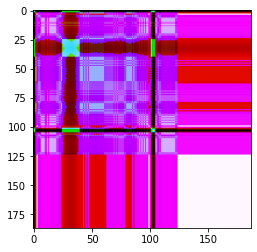

In [ ]:
import numpy as np
from pyts.image import GramianAngularField
from pyts.image import MarkovTransitionField
from pyts.image import RecurrencePlot
from PIL import Image
import matplotlib.pyplot as plt

n = 0

temp_serie = np.genfromtxt('drive/MyDrive/TensorFlow/DataSets/HeartBeat/mitbih_test.csv', delimiter=',',max_rows=150, skip_header=n)
y = temp_serie[:,-1]
print(y)
temp_serie = np.delete(temp_serie,-1,axis=1)

gaf = GramianAngularField(method='summation')
mtf = MarkovTransitionField(n_bins=8)
rp = RecurrencePlot(threshold=0.1,percentage=10)

gaf_img_serie = (gaf.fit_transform(temp_serie) + 1) / 2
mtf_img_serie = mtf.fit_transform(temp_serie)
rp_img_serie = rp.fit_transform(temp_serie)

img_serie = np.stack((gaf_img_serie,mtf_img_serie,rp_img_serie),axis=1)
img_serie = np.moveaxis(img_serie,1,-1)

plt.imshow(img_serie[0])

In [ ]:
path_train = 'drive/MyDrive/Pytorch/Datasets/mitbih_fusion/train/'
path_test = 'drive/MyDrive/Pytorch/Datasets/mitbih_fusion/test/'
for i,data in enumerate(img_serie):
  img = Image.fromarray((data.squeeze()*255).astype(np.uint8),'RGB')
  name = str(y[n+i])+'/fusion_' + str(n+i) + '.jpg'
  img.save(path_test + name)